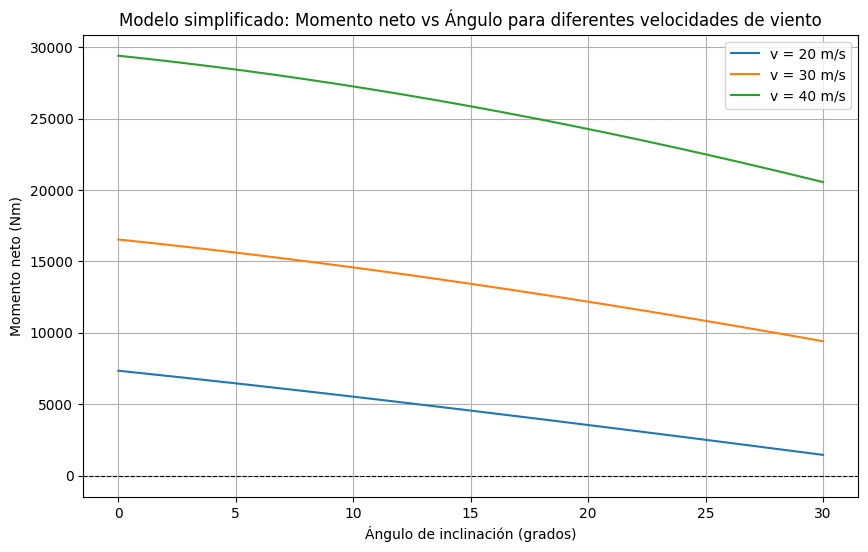

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros físicos
rho = 1.225        # Densidad del aire en kg/m^3
g = 9.81           # Aceleración gravitacional en m/s^2
m = 5000           # Masa de la estructura en kg
d = 0.2            # Brazo de palanca efectivo por posicionamiento inadecuado en m

# Parámetros de la figura laminada (similar a un cometa)
A = 5              # Área efectiva en m^2
l_eff = 4          # Brazo de palanca efectivo para el viento en m
C_m = 1.5          # Coeficiente aerodinámico que aumenta el efecto del viento

# Rango de ángulos de inclinación (theta) en radianes
theta = np.linspace(0, np.pi/6, 300)  # de 0 a 30° aprox.

# Velocidades de viento a analizar (en m/s)
wind_speeds = [20, 30, 40]  # m/s

# Configuración del plot
plt.figure(figsize=(10, 6))

for v in wind_speeds:
    # Fuerza del viento (considerando reducción del área efectiva con cos(theta))
    F_wind = 0.5 * rho * v**2 * A * np.cos(theta)
    # Momento inducido por el viento (aumentado por la vulnerabilidad de la forma)
    M_wind = C_m * F_wind * l_eff

    # Momento restaurador por la gravedad (resta a medida que aumenta theta)
    M_grav = m * g * d * np.sin(theta)

    # Momento neto: si es positivo, el viento domina sobre la restauración de la gravedad
    M_net = M_wind - M_grav

    plt.plot(np.degrees(theta), M_net, label=f'v = {v} m/s')

# Líneas de referencia para M_net = 0 (equilibrio)
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')
plt.xlabel('Ángulo de inclinación (grados)')
plt.ylabel('Momento neto (Nm)')
plt.title('Modelo simplificado: Momento neto vs Ángulo para diferentes velocidades de viento')
plt.legend()
plt.grid(True)
plt.show()


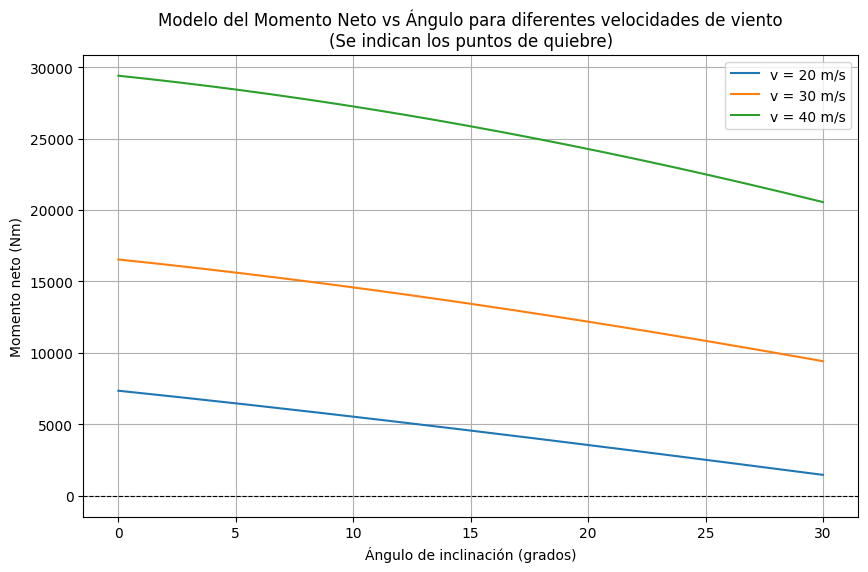

Puntos críticos (ángulo en radianes y grados) para el quiebre:
Velocidad 20 m/s: No se encontró punto de quiebre (M_net no cruza 0).
Velocidad 30 m/s: No se encontró punto de quiebre (M_net no cruza 0).
Velocidad 40 m/s: No se encontró punto de quiebre (M_net no cruza 0).


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros físicos y geométricos
rho = 1.225        # Densidad del aire en kg/m^3
g = 9.81           # Aceleración gravitacional en m/s^2
m = 5000           # Masa de la estructura en kg
d = 0.2            # Brazo de palanca efectivo (error de posicionamiento) en m

# Parámetros de la figura laminada (forma de cometa)
A = 5              # Área efectiva en m^2
l_eff = 4          # Brazo de palanca efectivo del viento en m
C_m = 1.5          # Coeficiente aerodinámico que amplifica el efecto del viento

# Rango de ángulos de inclinación (theta) en radianes (0 a 30° aprox.)
theta = np.linspace(0, np.pi/6, 300)

# Velocidades de viento a analizar (en m/s)
wind_speeds = [20, 30, 40]

# Diccionario para almacenar el punto crítico de cada velocidad
critical_points = {}

plt.figure(figsize=(10, 6))

for v in wind_speeds:
    # Fuerza del viento considerando la proyección del área (cos(theta))
    F_wind = 0.5 * rho * v**2 * A * np.cos(theta)
    # Momento inducido por el viento, incrementado por la vulnerabilidad de la forma
    M_wind = C_m * F_wind * l_eff
    # Momento restaurador proporcionado por la gravedad
    M_grav = m * g * d * np.sin(theta)

    # Momento neto: diferencia entre el efecto del viento y la fuerza restauradora
    M_net = M_wind - M_grav

    # Identificar el punto de quiebre: el ángulo donde M_net cruza de negativo a positivo
    # Se detecta el primer cambio de signo en M_net
    sign_change = np.where(np.diff(np.sign(M_net)) > 0)[0]
    if len(sign_change) > 0:
        idx = sign_change[0]
        # Interpolación lineal para obtener una estimación precisa del ángulo crítico (M_net = 0)
        theta_crit = np.interp(0, [M_net[idx], M_net[idx+1]], [theta[idx], theta[idx+1]])
        critical_points[v] = theta_crit
        # Graficar el punto crítico en la curva
        plt.plot(np.degrees(theta_crit), 0, 'o', label=f'Punto de quiebre v={v} m/s')
    else:
        critical_points[v] = None

    # Graficar la curva del momento neto para la velocidad de viento actual
    plt.plot(np.degrees(theta), M_net, label=f'v = {v} m/s')

# Línea de referencia en M_net = 0 (umbral de estabilidad)
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')
plt.xlabel('Ángulo de inclinación (grados)')
plt.ylabel('Momento neto (Nm)')
plt.title('Modelo del Momento Neto vs Ángulo para diferentes velocidades de viento\n(Se indican los puntos de quiebre)')
plt.legend()
plt.grid(True)
plt.show()

# Impresión de los puntos críticos de quiebre
print("Puntos críticos (ángulo en radianes y grados) para el quiebre:")
for v, theta_crit in critical_points.items():
    if theta_crit is not None:
        print(f"Velocidad {v} m/s: theta crítico = {theta_crit:.3f} rad ({np.degrees(theta_crit):.2f}°)")
    else:
        print(f"Velocidad {v} m/s: No se encontró punto de quiebre (M_net no cruza 0).")


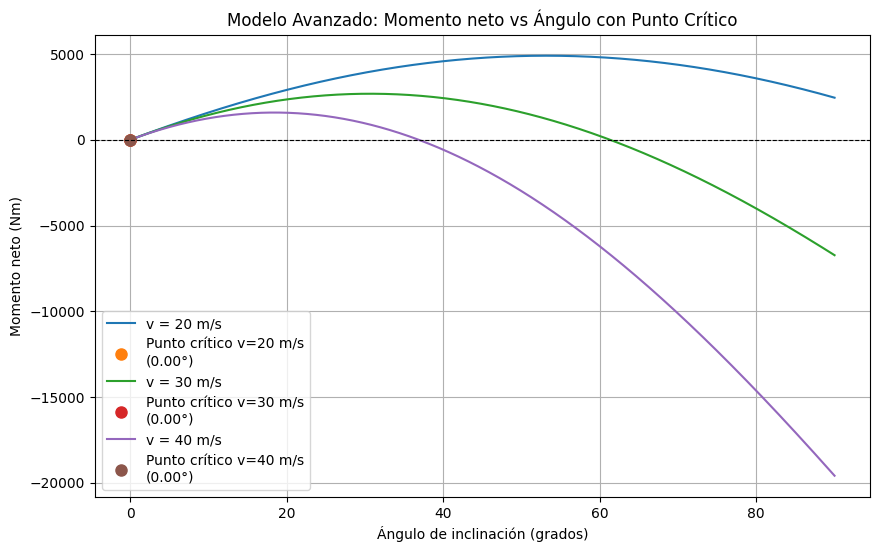

Puntos críticos (ángulo en radianes y grados) para el quiebre:
Velocidad 20 m/s: theta crítico = 0.000 rad (0.00°)
Velocidad 30 m/s: theta crítico = 0.000 rad (0.00°)
Velocidad 40 m/s: theta crítico = 0.000 rad (0.00°)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros físicos y geométricos
rho = 1.225      # Densidad del aire en kg/m^3
g = 9.81         # Aceleración gravitacional en m/s^2
m = 5000         # Masa de la estructura en kg
d = 0.2          # Brazo de palanca efectivo debido al error de posicionamiento en m

# Parámetros de la figura en forma de "cometa"
A0 = 5           # Área máxima (m^2) de la parte superior
l_eff = 4        # Brazo de palanca efectivo para el viento en m
C_m = 1.5        # Coeficiente aerodinámico que amplifica el efecto del viento

# Rango de ángulos de inclinación (theta) en radianes: de 0 a 90° (para capturar todo el comportamiento)
theta = np.linspace(0, np.pi/2, 1000)

# Velocidades de viento a analizar (en m/s)
wind_speeds = [20, 30, 40]

# Función que define el momento neto para un ángulo y velocidad determinados
def M_net(theta, v):
    # Área efectiva que crece con theta (modelo: 0 en theta=0, A0 cuando theta=pi)
    A_eff = A0 * (1 - np.cos(theta))
    M_viento = C_m * 0.5 * rho * v**2 * A_eff * l_eff
    M_grav = m * g * d * np.sin(theta)
    return M_grav - M_viento

# Preparar la figura
plt.figure(figsize=(10, 6))
critical_points = {}

# Para cada velocidad, graficar la curva y encontrar el punto de quiebre
for v in wind_speeds:
    M_values = M_net(theta, v)
    plt.plot(np.degrees(theta), M_values, label=f'v = {v} m/s')

    # Buscamos el punto donde M_net cambia de positivo (restaurador) a negativo (destabilizador)
    # Se asume que en theta=0, M_net es 0 (o muy cercano) y para ángulos mayores se vuelve negativo al pasar el quiebre.
    # Buscamos la primera intersección M_net = 0 para theta > 0.
    sign_change = np.where(np.diff(np.sign(M_values)))[0]
    if sign_change.size > 0:
        idx = sign_change[0]
        # Interpolación lineal para hallar theta_crit con mayor precisión
        theta_crit = np.interp(0, [M_values[idx], M_values[idx+1]], [theta[idx], theta[idx+1]])
        critical_points[v] = theta_crit
        plt.plot(np.degrees(theta_crit), 0, 'o', markersize=8,
                 label=f'Punto crítico v={v} m/s\n({np.degrees(theta_crit):.2f}°)')
    else:
        critical_points[v] = None

# Línea horizontal en M_net = 0 para referencia
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')
plt.xlabel('Ángulo de inclinación (grados)')
plt.ylabel('Momento neto (Nm)')
plt.title('Modelo Avanzado: Momento neto vs Ángulo con Punto Crítico')
plt.legend()
plt.grid(True)
plt.show()

# Impresión de los puntos críticos encontrados
print("Puntos críticos (ángulo en radianes y grados) para el quiebre:")
for v, theta_crit in critical_points.items():
    if theta_crit is not None:
        print(f"Velocidad {v} m/s: theta crítico = {theta_crit:.3f} rad ({np.degrees(theta_crit):.2f}°)")
    else:
        print(f"Velocidad {v} m/s: No se encontró punto crítico (no hay cambio de signo).")
